In [137]:
import numpy as np

from sklearn import datasets
from skimage import io

from sklearn.model_selection import train_test_split
from sklearn import svm

%reload_ext version_information
np.__version__

'1.16.4'

<h3> 1a) </h3>

Laden Sie, wie im Tutorium beschrieben, den berühmten MNIST-Datensatz mit eingescannten handgeschriebenen Ziffern mit der Funktion <I>digits = load_digits()</I>.

In [4]:
digits = datasets.load_digits()

Grundlegende Informationen zum Datensatz erhalten Sie durch Ausgabe des Attributes digits.DESCR.

In [46]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

Die Merkmalsvektoren (hier Bilder) sind die Zeilen der Designmatrix <I>digits.data</I>, die zugehörigen Labels stehen in dem Vektor <I>digits.target</I>.

In [12]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [13]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [20]:
digits.data[0].shape

(64,)

Wie in Übung 1 gelernt, finden Sie heraus, wieviele und welche Labels und wieviele Daten es gibt, und welche Dimension diese haben.

In [55]:
print('Anzahl Labels:', digits.target.shape,
      '\nLabelarten: ', set(digits.target),
      '\nAnzahl und Dimensionen der Daten:', digits.data.shape)

Anzahl Labels: (1797,) 
Labelarten:  {0, 1, 2, 3, 4, 5, 6, 7, 8, 9} 
Anzahl und Dimensionen der Daten: (1797, 64)


Stellen Sie eine Zufallsauswahl von 10 Bildern (zusammen mit der Klassenzugehörigkeit) in
Ihrem Notebook dar.

In [56]:
index = np.random.randint(digits.data.shape[0], size=10)
test = []
test_target = []
for i in index:
    test.append(np.resize(digits.data[i], (8,8)).astype(int))
    test_target.append(digits.target[i])

[2, 4, 9, 0, 8, 7, 2, 1, 1, 0]

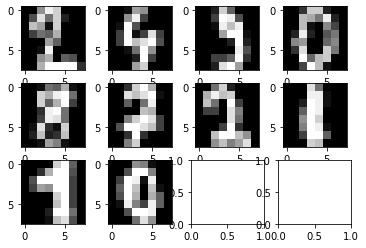

In [57]:
col = io.imshow_collection(test, cmap='gray')
test_target

<h3> 1b) </h3>

Teilen Sie den Datensatz zufällig in einen nichtüberlappenden Trainings- und Testdatensatz auf, so dass ein Viertel der Daten zu Testdaten werden. Dies geschieht am Einfachsten
mit der Funktion <I>sklearn.model_selection.train_test_split()</I>.

In [109]:
train_data, test_data, train_target, test_target = train_test_split(digits.data, digits.target, test_size=0.25)

Trainieren Sie einen Supportvektor-Klassifikator (Standard in Scikit Learn ist eine 1-Norm Soft Margin SVM, bei
Mehrklassenproblemen wird automatisch ein Satz von one-vs.-one-Klassifikatoren erstellt)
mit einem RBF-Kern mit γ = 0.015 und einem Parameter C = 1.0.

In [110]:
classificator = svm.SVC(gamma=0.015, C=1.0)
classificator.fit(train_data, train_target)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.015, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Bestimmen Sie den Anteil korrekt klassifizierter Beispiele (Korrektklassifikationsrate, Treffergenauigkeit, engl.
Accuracy) im Trainings- und Testdatensatz mithilfe der Funktion SVC.score(). Underfitting liegt vor, wenn Ihr Klassifikator auf den Trainingsdatensatz eine Treffergenauigkeit von
deutlich unter 100% erzielt, bei Overfitting liegt die Treffergenauigkeit auf dem Testdatensatz deutlich unter der auf dem Trainingsdatensatz. Welcher Fall liegt hier vor? 

In [108]:
#classificator.score(train_data, train_target)

In [111]:
classificator.score(test_data, test_target)

0.4111111111111111

Hier liegt Overfitting vor.

Probieren
Sie alternativ die SVM-Parameter γ = 0.001 und C = 100 und vergleichen Sie. Wiederholen
Sie das Experiment für einen anderen Zufallssplit in Trainings- und Testdatensatz. Wie stark
hängt Ihr Ergebnis von der zufälligen Teilung in Trainings- und Testdatensatz ab?

In [112]:
classificator = svm.SVC(gamma=0.001, C=100.0)
classificator.fit(train_data, train_target)

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [107]:
#classificator.score(train_data, train_target)

In [113]:
classificator.score(test_data, test_target)

0.9888888888888889

In [151]:
for t in range(0,10):
    train_data, test_data, train_target, test_target = train_test_split(digits.data, digits.target, test_size=0.25)
    classificator.fit(train_data, train_target)
    print(classificator.score(test_data, test_target))

0.9911111111111112
1.0
0.9933333333333333
0.9866666666666667
0.9866666666666667
0.9911111111111112
0.9911111111111112
0.9955555555555555
0.9933333333333333
0.9911111111111112


Das Ergebnis hängt nur wenig davon ab, wie die Datensätze aufgeteilt werden.

In [138]:
%version_information numpy, sklearn

Software versions
Python 3.7.3 64bit [MSC v.1915 64 bit (AMD64)]
IPython 7.6.1
OS Windows 10 10.0.18362 SP0
numpy 1.16.4
sklearn 0.21.2
Mon Nov 25 10:44:58 2019 Mitteleuropäische Zeit